# Introducing the gosduma7 Dataset

In [1]:
# Some initialization magic
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Let's load up the data
import json

with open("scrapyproject/results.json") as fin:
    lines = [json.loads(line) for line in fin]

In [2]:
# Here's what it looks like. Each line corresponds to a single electorate.
lines[0]["electorate"]

'Республика Адыгея (Адыгея) - Адыгейский'

In [3]:
# For each we keep the votes broken down by party, and further broken down by the polling station
# Thus, for the Adygea electorate, the Rodina party achieved 2065 votes across the 9 polling stations.
lines[0]["votes"][0]

{'stations': [{'name': 'Адыгейская', 'value': 9.0},
  {'name': 'Гиагинская', 'value': 135.0},
  {'name': 'Кошехабльская', 'value': 137.0},
  {'name': 'Красногвардейская', 'value': 59.0},
  {'name': 'Майкопская', 'value': 327.0},
  {'name': 'Майкопская городская', 'value': 1105.0},
  {'name': 'Тахтамукайская', 'value': 268.0},
  {'name': 'Теучежская', 'value': 6.0},
  {'name': 'Шовгеновская', 'value': 19.0}],
 'subtitle': '1. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"',
 'total_value': 2065.0}

In [4]:
# We also keep the overall stats for the electorate.
# Thus, the Adygea electorate consisted of 339685 eligible votes across the 9 polling stations.
lines[0]["stats"][0]

{'stations': [{'name': 'Адыгейская', 'value': 11932.0},
  {'name': 'Гиагинская', 'value': 24743.0},
  {'name': 'Кошехабльская', 'value': 22779.0},
  {'name': 'Красногвардейская', 'value': 21925.0},
  {'name': 'Майкопская', 'value': 46456.0},
  {'name': 'Майкопская городская', 'value': 130529.0},
  {'name': 'Тахтамукайская', 'value': 55175.0},
  {'name': 'Теучежская', 'value': 13768.0},
  {'name': 'Шовгеновская', 'value': 12378.0}],
 'subtitle': 'Число избирателей, внесенных в список избирателей на момент окончания голосования',
 'total_value': 339685.0}

In [5]:
# The order of parties is the same across the entire dataset. Let's grab it for later.
party_index = dict((b, a) for (a, b) in enumerate([party["subtitle"] for party in lines[0]["votes"]]))
party_index

{'1. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"': 0,
 '10. Общественная организация Всероссийская политическая партия "Гражданская Сила"': 9,
 '11. Политическая партия "Российская объединенная демократическая партия "ЯБЛОКО"': 10,
 '12. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ"': 11,
 '13. Политическая партия "ПАТРИОТЫ РОССИИ"': 12,
 '14. Политическая партия СПРАВЕДЛИВАЯ РОССИЯ': 13,
 '2. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ': 1,
 '3. Политическая партия "Российская партия пенсионеров за справедливость"': 2,
 '4. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"': 3,
 '5. Политическая партия "Российская экологическая партия "Зеленые"': 4,
 '6. Политическая партия "Гражданская Платформа"': 5,
 '7. Политическая партия ЛДПР - Либерально-демократическая партия России': 6,
 '8. Политическая партия "Партия народной свободы" (ПАРНАС)': 7,
 '9. Всероссийская политическая партия "ПАРТИЯ РОСТА"': 8}

In [6]:
# ... and let's do the same for the stats.
stats_index = dict((b, a) for (a, b) in enumerate([stat["subtitle"] for stat in lines[0]["stats"]]))
stats_index

{'Число действительных избирательных бюллетеней': 9,
 'Число избирателей, внесенных в список избирателей на момент окончания голосования': 0,
 'Число избирателей, проголосовавших по открепительным удостоверениям на избирательном участке': 12,
 'Число избирательных бюллетеней, выданных в помещении для голосования в день голосования': 3,
 'Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования': 4,
 'Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно': 2,
 'Число избирательных бюллетеней, полученных участковой избирательной комиссией': 1,
 'Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования': 6,
 'Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования': 7,
 'Число недействительных избирательных бюллетеней': 8,
 'Число открепительных удостоверений, выданных избирателям территориальной избирательной комиссией': 14,
 'Число открепительных удостоверений, выданных на избира

In [7]:
def extract_stations(full_party_name):
    # Grab the percentage of votes the party attained at each polling station, country-wide.
    full_stat_name = 'Число избирателей, внесенных в список избирателей на момент окончания голосования'
    stat_idx = stats_index[full_stat_name]
    
    party_idx = party_index[full_party_name]

    stations = []
    for electorate in lines:
        # The total number of voters at each station electorate
        assert electorate["stats"][stat_idx]["subtitle"] == full_stat_name
        voters = {}
        for station in electorate["stats"][stat_idx]["stations"]:
            voters[station["name"]] = station["value"]

        # Votes for "United Russia" across all stations.
        assert electorate["votes"][party_idx]["subtitle"] == full_party_name
        for station in electorate["votes"][party_idx]["stations"]:        
            stations.append(
                {
                    "electorate": electorate["electorate"],
                    "station": station["name"],
                    "fraction": station["value"] / voters[station["name"]],
                    "votes": station["value"] 
                }
            )
    return stations

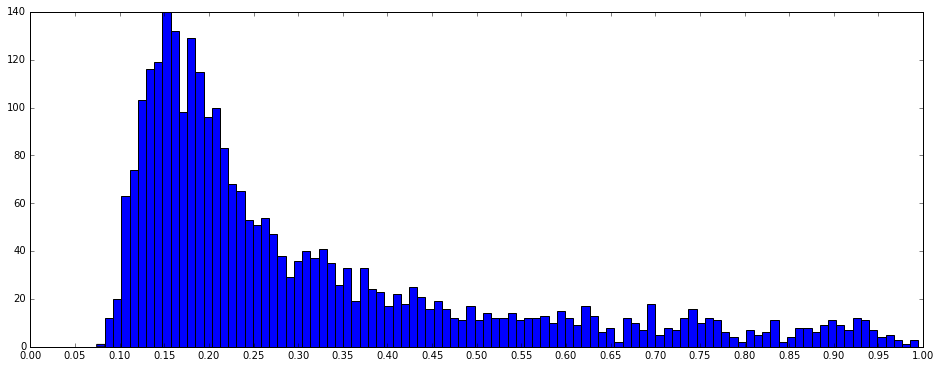

In [8]:
# Let's focus on the "United Russia" party and see the distributions of its 'winning fraction'.
values = sorted([station["fraction"] 
    for station in extract_stations('4. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"')
])
plt.figure(figsize=(16, 6))
plt.hist(values, bins=100)
plt.xticks(np.arange(0.0, 1.05, 0.05))
print()

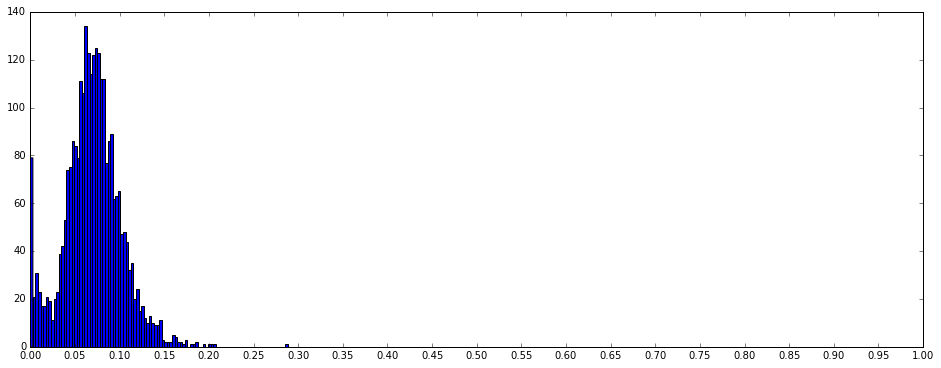

In [9]:
# Let's have a look at the same figure for LDPR, which came a distant second.
values = sorted([station["fraction"] 
    for station in extract_stations('7. Политическая партия ЛДПР - Либерально-демократическая партия России')
])
plt.figure(figsize=(16, 6))
plt.hist(values, bins=100)
plt.xticks(np.arange(0.0, 1.05, 0.05))
print()

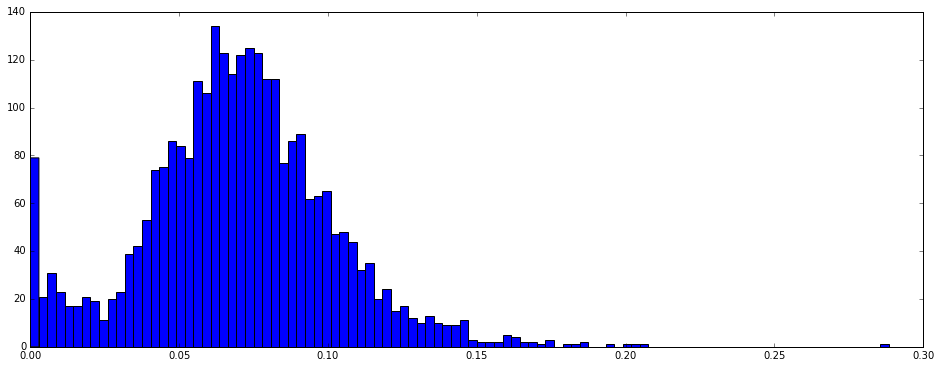

In [10]:
# Since they never ever achieved over 0.25, let's zoom in on the lower quarter.
values = sorted([station["fraction"] 
    for station in extract_stations('7. Политическая партия ЛДПР - Либерально-демократическая партия России')
])
plt.figure(figsize=(16, 6))
plt.hist(values, bins=100)
plt.xticks(np.arange(0.0, 0.35, 0.05))
print()

# Recreating the Graph from [Slon.ru](https://tjournal.ru/34502-zhurnalisti-slonru-matematicheski-obnaruzhili-priznaki-masshtabnih-falsifikacii-na-viborah-v-gosdumu)

In [11]:
import collections

def round_nearest(x, a=0.002):
    # http://stackoverflow.com/questions/28425705/python-rounding-a-floating-point-number-to-nearest-0-05
    return round(x / a) * a

def bin_by_fraction(stations):
    bins = collections.defaultdict(list)
    for station in stations:
        bins[round_nearest(station["fraction"])].append(station)
    return sorted(bins.items())

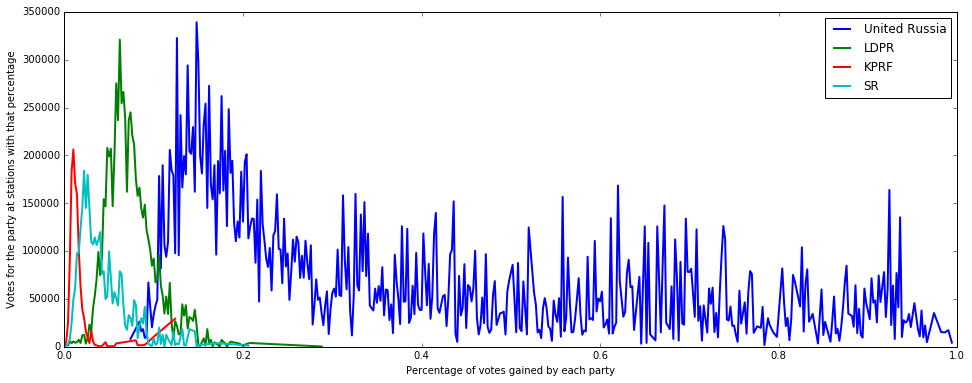

In [12]:
united_bins = bin_by_fraction(extract_stations('4. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"'))
ldpr_bins = bin_by_fraction(extract_stations('7. Политическая партия ЛДПР - Либерально-демократическая партия России'))
kprf_bins = bin_by_fraction(extract_stations('2. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ'))
sr_bins = bin_by_fraction(extract_stations('14. Политическая партия СПРАВЕДЛИВАЯ РОССИЯ'))

plt.figure(figsize=(16, 6))
linewidth = 2

x1 = [val for (val, _) in united_bins]
y1 = [sum(st["votes"] for st in stations) for (_, stations) in united_bins]
plt.plot(x1, y1, linewidth=linewidth, label="United Russia")

x2 = [val for (val, _) in ldpr_bins]
y2 = [sum(st["votes"] for st in stations) for (_, stations) in ldpr_bins]
plt.plot(x2, y2, linewidth=linewidth, label="LDPR")

x3 = [val for (val, _) in kprf_bins]
y3 = [sum(st["votes"] for st in stations) for (_, stations) in kprf_bins]
plt.plot(x3, y3, linewidth=linewidth, label="KPRF")

x4 = [val for (val, _) in sr_bins]
y4 = [sum(st["votes"] for st in stations) for (_, stations) in sr_bins]
plt.plot(x4, y4, linewidth=linewidth, label="SR")

plt.ylabel("Votes for the party at stations with that percentage")
plt.xlabel("Percentage of votes gained by each party")

plt.legend()

print()